In [285]:
import numpy as np
from tqdm.notebook import tqdm

In [286]:
with open('input_day9_stg.txt', 'rt') as f:
    input=f.read() #[x for x in f.read().split('\n') if x != '']
print(input[0:500])

2199943210
3987894921
9856789892
8767896789
9899965678



In [287]:
with open('input_day9_prd.txt', 'rt') as f:
    input=f.read() #[x for x in f.read().split('\n') if x != '']
print(input[0:500])
print(input[-500:])

5656921987125678979998760234965456789998768789239876323457896545467894567987232345679209876567998656
4349899876234599568987654345894345999987656678945965212348965434356943459876101956798912987459876541
5498789854345689467898765456789297898999736567899874323489654321248932398765219897987893498598765432
6989598765459789356989878767896345987432125456789985434578965432357953499954398789376789569679876543
987545987656989324987698989896547697652101234569987664568987654345689468987567964323459899878998
78943379899763234678945689876543234878998875642345689987654349899987654324598765432345899899165
8998789321234789854345789656999987632123569987984551234793498875456789998783213459876543656789678976
9549895452375699965656798767899874321012478976543210159892109986767899989654302345998754567897567897
0234976565467789798767899988998765434566567897865421767899212987898909876543213566789766678998486789
1655989876988894569989910199019876545679788998976562345678924598999212987654424587899887889239345678

In [288]:
heightmap=np.array([[int(x) for x in r] for r in input.split('\n') if r != ''])
heightmap

array([[5, 6, 5, ..., 6, 5, 6],
       [4, 3, 4, ..., 5, 4, 1],
       [5, 4, 9, ..., 4, 3, 2],
       ...,
       [9, 5, 4, ..., 8, 9, 7],
       [0, 2, 3, ..., 7, 8, 9],
       [1, 6, 5, ..., 6, 7, 8]])

In [289]:
nx=heightmap.shape[0]
ny=heightmap.shape[1]
nx, ny

(100, 100)

In [290]:
down =heightmap<np.concatenate((heightmap[1:], [np.ones(ny)*np.inf]))
up   =heightmap<np.concatenate(([np.ones(ny)*np.inf], heightmap[:-1]))
right=heightmap<np.concatenate((heightmap.T[1:], [np.ones(nx)*np.inf])).T
left =heightmap<np.concatenate(([np.ones(nx)*np.inf], heightmap.T[:-1])).T

In [291]:
sum(heightmap[down&up&left&right]+1)

452

In [292]:
# Part 2

In [293]:
lows=[list(loc) for loc in np.argwhere(down&up&left&right)]
lows

[[0, 6],
 [0, 10],
 [0, 24],
 [0, 46],
 [0, 86],
 [1, 1],
 [1, 53],
 [1, 77],
 [1, 91],
 [1, 99],
 [2, 31],
 [2, 63],
 [2, 69],
 [4, 40],
 [5, 16],
 [6, 56],
 [6, 82],
 [6, 90],
 [7, 4],
 [7, 23],
 [7, 47],
 [7, 95],
 [9, 11],
 [9, 63],
 [9, 72],
 [11, 81],
 [12, 18],
 [12, 48],
 [12, 57],
 [13, 30],
 [13, 32],
 [13, 86],
 [13, 96],
 [14, 60],
 [15, 3],
 [16, 42],
 [16, 62],
 [16, 69],
 [17, 22],
 [17, 70],
 [19, 38],
 [19, 52],
 [20, 10],
 [20, 31],
 [20, 67],
 [20, 78],
 [20, 87],
 [21, 95],
 [22, 0],
 [23, 61],
 [24, 98],
 [25, 8],
 [25, 12],
 [25, 14],
 [25, 46],
 [25, 69],
 [25, 90],
 [26, 40],
 [26, 55],
 [26, 83],
 [27, 34],
 [28, 24],
 [28, 79],
 [29, 96],
 [30, 13],
 [31, 4],
 [31, 52],
 [31, 68],
 [31, 87],
 [32, 59],
 [33, 37],
 [33, 45],
 [34, 73],
 [35, 29],
 [35, 95],
 [36, 15],
 [36, 90],
 [37, 19],
 [37, 64],
 [38, 0],
 [38, 9],
 [38, 24],
 [38, 77],
 [39, 37],
 [40, 56],
 [41, 46],
 [41, 51],
 [41, 85],
 [42, 15],
 [42, 95],
 [44, 2],
 [44, 22],
 [44, 29],
 [44, 68],
 

In [294]:
def above(loc, bassin):
    points=[]
    x, y = loc
    for i, j in [[-1,0], [1,0], [0,-1], [0, 1]]:
        if (i==0)&(j==0):
            pass
        if (0<=x+i<nx)&(0<=y+j<ny):
            if 9>heightmap[x+i, y+j]>=heightmap[x, y]:
                if [x+i, y+j] not in bassin:
                    points.append([x+i, y+j])
                    points.extend(above([x+i, y+j], bassin+points))
    return points
            

In [295]:
# Extended bassins including ridges
bassins_ext=[]
for low in tqdm(lows):
    bassin=[low]
    bassin.extend(above(low, [low]))
    bassins_ext.append({'low': low, 'bassin': bassin})


  0%|          | 0/205 [00:00<?, ?it/s]

In [296]:
bassins=[]
for i, bassin in enumerate(tqdm(bassins_ext)):
    other_bassins_locs=[l for b in bassins_ext for l in b['bassin'] if b['low'] != bassin['low']]
    locs=[
        loc 
        for loc
        in bassin['bassin']
        if loc not in other_bassins_locs
    ]
#    print(bassin)
    bassins.append({'i':i, 'low': bassin['low'], 'bassin': locs})

  0%|          | 0/205 [00:00<?, ?it/s]

In [262]:
for i in range(nx):
    for j in range(ny):
        found=False
        for ii, b in enumerate(bassins_ext_stg):
            if ([i, j] in b['bassin']) & (not found):
                print(ii, end='')
                found=True
        if not found:
            print('.', end='')
    print()
    
                

00...11111
0.222.1.11
.22222.3.1
22222.333.
.2...33333


In [297]:
np.prod(sorted([len({str(l) for l in b['bassin']}) for b in bassins])[-3:])

1263735

In [8]:
import pandas as pd

In [9]:
lows=pd.DataFrame(down&up&left&right)
heightmap_pd=pd.DataFrame(heightmap)

In [10]:
import rpy2
%load_ext rpy2.ipython

OSError: cannot load library '/usr/local/bin/R/lib/libR.dylib': dlopen(/usr/local/bin/R/lib/libR.dylib, 2): no suitable image found.  Did find:
	/usr/local/bin/R/lib/libR.dylib: stat() failed with errno=20

In [11]:
%%R
library(tidyverse)
library(magrittr)

UsageError: Cell magic `%%R` not found.


In [124]:
%%R -i lows 
lows %<>% as_tibble() %>% mutate(y=row_number()) %>% gather('x', 'v', `0`:`99`) %>% mutate(x=as.numeric(x))
lows

# A tibble: 10,000 × 3
       y     x v    
   <int> <dbl> <lgl>
 1     1     0 FALSE
 2     2     0 FALSE
 3     3     0 FALSE
 4     4     0 FALSE
 5     5     0 FALSE
 6     6     0 FALSE
 7     7     0 FALSE
 8     8     0 FALSE
 9     9     0 FALSE
10    10     0 FALSE
# … with 9,990 more rows


In [125]:
%%R -i heightmap_pd 
heightmap_pd %<>% as_tibble() %>% mutate(y=row_number()) %>% gather('x', 'h', `0`:`99`) %>% mutate(x=as.numeric(x))
heightmap_pd

# A tibble: 10,000 × 3
       y     x     h
   <int> <dbl> <int>
 1     1     0     5
 2     2     0     4
 3     3     0     5
 4     4     0     6
 5     5     0     9
 6     6     0     8
 7     7     0     9
 8     8     0     9
 9     9     0     8
10    10     0     7
# … with 9,990 more rows


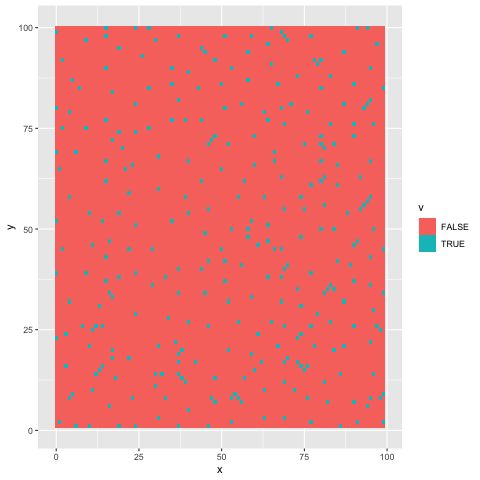

In [126]:
%%R
ggplot(lows) + 
    geom_tile(aes(x, y, fill=v))

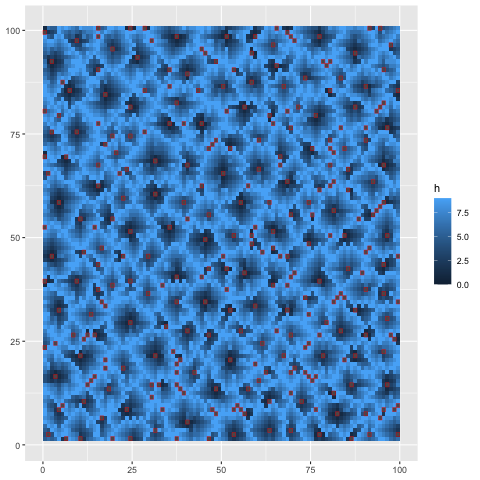

In [135]:
%%R
ggplot(heightmap_pd) + 
    geom_rect(aes(xmin=x, ymin=y, xmax=x+1, ymax=y+1, fill=h)) +
    geom_rect(data=lows %>% filter(v), aes(xmin=x, ymin=y, xmax=x+1, ymax=y+1,), color='red', size=.2)

In [128]:
%%R
inner_join(lows, heightmap_pd) %>% filter(v) %>% summarize(n(), sum(h+1))

Joining, by = c("y", "x")
# A tibble: 1 × 2
  `n()` `sum(h + 1)`
  <int>        <dbl>
1   304         1442
